In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_excel(
    './delivery/21년 7월_22년 6월 수도권제2본부-1.xlsx',
    sheet_name = 4)
df.head()

,업무일자,콜 번호,Unnamed: 2,Unnamed: 3,콜 상태,구분,접수회사,전화번호,상점,요청,출발지명,출발지주소,도착지명,도착지주소,도착상세,요청사항(배송메모),도착지 전화,등록자명,기사소속회사,기사명,기사전화,단말기번호,배달요금,부가세,요금지불,요금지원,콜수수료,상품금액,현금수금,결제방법,결제결과,승인번호,보류,예약,접수,요청.1,배차,픽업,완료,취소,사고,문의,취소자명,취소사유,외부연동구분,외부연동번호
0,20210701,0856-1461,배달,O_API,완료,NaN,슈퍼히어로옥길범박,032-351-1117,[범박]그래그래 피자&떡볶이,10,[범박]🌈 그래그래 피자&떡볶이,경기 부천시 범박동 155-2 현대리치모아,부천시 범박동 150-2,부천시 범박동 150-2,부천범박힐스테이트 6단지 606-2203,고객요청사항: 리뷰이벤트 치즈오븐스파게티할게요! (수저포크 X) / #606#220...,0503-7368-2118,[헬로월드],슈퍼히어로옥길범박,[히어로]박건,010-2434-8958,010-2434-8958,3500,350,캐쉬,0,300,21900,NaN,선불,NaN,NaN,NaN,NaT,2021-07-01 23:46:53,2021-07-01 23:47:01,2021-07-01 23:47:02,2021-07-02 00:06:36,2021-07-02 00:14:43,NaT,NaN,NaN,NaN,NaN,0F9A246688,130579385
1,20210701,0854-2211,배달,NaN,완료,NaN,슈퍼히어로옥길범박,032-345-5938,[히어로]59쌀피자,10,[옥길]오구쌀피자,경기 부천시 옥길동 744-2,센트리뷰,부천시 옥길동 771-1 부천옥길센트리뷰아파트 전기차충전소,702-1502호,NaN,010-3009-1539,[상점직접],슈퍼히어로옥길범박,[히어로]이승민,010-4137-8498,010-4137-8498,3500,0,캐쉬,0,300,26000,NaN,카드,전체완료,승인:신한카드 (35534604),NaN,NaT,2021-07-01 23:43:41,2021-07-01 23:43:48,2021-07-01 23:48:30,2021-07-01 23:49:48,2021-07-01 23:54:25,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,20210701,0845-0121,배달,푸드테크,완료,NaN,슈퍼히어로옥길범박,032-343-9294,[히어로]굽네치킨옥길점,10,[옥길]굽네치킨,경기 부천시 옥길동 776-1 부천옥길자이,옥길동 739-1,부천시 옥길동 739-1,제이드카운티2단지 206동 1401호,"[선결제완료]일회용 수저, 포크 X 이벤트 참여- 콜라사이즈업 요기요콜센터: 166...",0504-4735-1039,[푸드테크],슈퍼히어로옥길범박,[히어로]이승민,010-4137-8498,010-4137-8498,3500,350,캐쉬,0,300,17000,NaN,선불,NaN,NaN,NaN,NaT,2021-07-01 23:28:20,2021-07-01 23:28:27,2021-07-01 23:28:30,2021-07-01 23:41:05,2021-07-01 23:41:08,NaT,NaN,NaN,NaN,NaN,FoodTech,ft140269805
3,20210701,0841-7616,배달,O_API,완료,NaN,슈퍼히어로옥길범박,032-348-5379,[히어로]원할머니보쌈,10,[옥길]원할머니보쌈,경기 부천시 옥길동 705-1,부천시 소사본동 133-12,부천시 소사본동 133-12,부천소사역 푸르지오 부천소사역푸르지오아파트 105동 202호,고객요청사항: (수저포크 X) / 조심히 안전하게 와주세요 :),010-9519-5109,[헬로월드],부천 러쉬,변재화(Rush역곡),010-4999-0226,010-4999-0226,4500,450,캐쉬,0,300,54000,NaN,선불,NaN,NaN,NaN,NaT,2021-07-01 23:22:55,2021-07-01 23:23:24,2021-07-01 23:23:25,2021-07-01 23:26:14,2021-07-01 23:37:00,NaT,NaN,NaN,NaN,NaN,0F9A246688,130576038
4,20210701,0837-7181,배달,푸드테크,완료,NaN,슈퍼히어로옥길범박,032-343-9294,[히어로]굽네치킨옥길점,10,[옥길]굽네치킨,경기 부천시 옥길동 776-1 부천옥길자이,옥길동 780-1,부천시 옥길동 780-1,104-501,[선결제완료](수저포크 X) (배달요청)조심히 안전하게 와주세요 :),0503-7384-2898,[푸드테크],슈퍼히어로옥길범박,[히어로]박건,010-2434-8958,010-2434-8958,3500,350,캐쉬,0,300,24400,NaN,선불,NaN,NaN,NaN,NaT,2021-07-01 23:16:10,2021-07-01 23:16:16,2021-07-01 23:16:22,2021-07-01 23:28:31,2021-07-01 23:30:19,NaT,NaN,NaN,NaN,NaN,FoodTech,ft140267160


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112249 entries, 0 to 112248
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   업무일자        112249 non-null  int64         
 1   콜 번호        112249 non-null  object        
 2   Unnamed: 2  112249 non-null  object        
 3   Unnamed: 3  104731 non-null  object        
 4   콜 상태        112249 non-null  object        
 5   구분          0 non-null       float64       
 6   접수회사        112249 non-null  object        
 7   전화번호        112249 non-null  object        
 8   상점          112249 non-null  object        
 9   요청          112249 non-null  object        
 10  출발지명        112245 non-null  object        
 11  출발지주소       112249 non-null  object        
 12  도착지명        112237 non-null  object        
 13  도착지주소       112239 non-null  object        
 14  도착상세        111559 non-null  object        
 15  요청사항(배송메모)  104403 non-null  object        
 16  도착

In [18]:
df.isna().sum()

업무일자               0
콜 번호               0
Unnamed: 2         0
Unnamed: 3      7518
콜 상태               0
구분            112249
접수회사               0
전화번호               0
상점                 0
요청                 0
출발지명               4
출발지주소              0
도착지명              12
도착지주소             10
도착상세             690
요청사항(배송메모)      7846
도착지 전화          1119
등록자명               0
기사소속회사          1770
기사명             1770
기사전화            1770
단말기번호           1770
배달요금               0
부가세                0
요금지불               0
요금지원               0
콜수수료               0
상품금액               0
현금수금          103090
결제방법               0
결제결과           94505
승인번호           94898
보류            112249
예약            112175
접수               596
요청.1            3560
배차              1737
픽업              2156
완료              2131
취소            110089
사고            112249
문의            112249
취소자명          110108
취소사유          111676
외부연동구분          7518
외부연동번호         15653
dtype: int64

In [19]:
df1 = df[df['완료'].notnull()]
df1.describe()

,업무일자,구분,배달요금,부가세,요금지원,콜수수료,상품금액,보류,사고,문의
count,1.101180e+05,0.0,110118.000000,110118.000000,110118.000000,110118.000000,110118.000000,0.0,0.0,0.0
mean,2.021095e+07,NaN,4153.774133,374.889028,0.335095,346.139596,25086.462894,NaN,NaN,NaN
std,1.746191e+02,NaN,794.528261,147.625035,23.107488,55.164045,15179.297211,NaN,NaN,NaN
min,2.021070e+07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2.021081e+07,NaN,3500.000000,350.000000,0.000000,300.000000,16500.000000,NaN,NaN,NaN
50%,2.021092e+07,NaN,4000.000000,400.000000,0.000000,300.000000,21800.000000,NaN,NaN,NaN
75%,2.021111e+07,NaN,4500.000000,450.000000,0.000000,400.000000,30000.000000,NaN,NaN,NaN
max,2.021123e+07,NaN,40000.000000,4000.000000,4500.000000,500.000000,868000.000000,NaN,NaN,NaN


In [20]:
df1.corr()

,업무일자,구분,배달요금,부가세,요금지원,콜수수료,상품금액,보류,사고,문의
업무일자,1.000000,NaN,0.266287,0.110068,0.008152,0.714323,0.032477,NaN,NaN,NaN
구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
배달요금,0.266287,NaN,1.000000,0.563921,-0.006319,0.213458,0.227473,NaN,NaN,NaN
부가세,0.110068,NaN,0.563921,1.000000,-0.005080,0.097366,0.141344,NaN,NaN,NaN
요금지원,0.008152,NaN,-0.006319,-0.005080,1.000000,-0.011132,0.000354,NaN,NaN,NaN
콜수수료,0.714323,NaN,0.213458,0.097366,-0.011132,1.000000,0.019715,NaN,NaN,NaN
상품금액,0.032477,NaN,0.227473,0.141344,0.000354,0.019715,1.000000,NaN,NaN,NaN
보류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
사고,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
문의,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


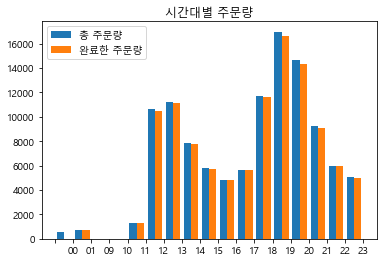

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

def select_time(li1):
    time_list = []

    for time in li1:
        time_list.append(str(time)[11:13])
    
    return sorted(time_list)

all_time_list = select_time(df['접수'])
time_list = select_time(df1['접수'])

hist = plt.hist((all_time_list, time_list), bins=17,
label=('총 주문량', '완료한 주문량'))
plt.title('시간대별 주문량')
plt.legend()
plt.show()

최대배달시간 : 345분 28초
최소배달시간 : 0분 0초
평균배달시간 : 10분 11초
최대배달시간 : 26분 39초
최소배달시간 : 5분 1초
평균배달시간 : 11분 58초


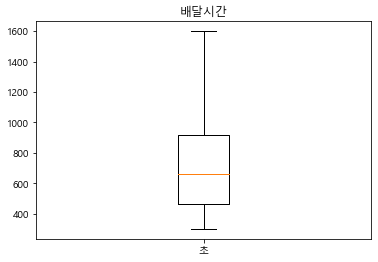

In [54]:
from datetime import datetime
import math

def trans_second(list1, list2):
    second = []

    for li1, li2 in zip(list1, list2):
        tmp = li1 - li2
        second.append(tmp.seconds)
    
    return [x for x in second if math.isnan(x) == False]

def trans_time(second):
    m = second // 60
    s = second % 60
    time = int(m), int(s)

    return time

second = trans_second(df1['완료'], df1['픽업'])
max_time = trans_time(max(second))
min_time = trans_time(min(second))
avg_time = trans_time(sum(second)/len(second))

print(f'최대배달시간 : {max_time[0]}분 {max_time[1]}초')
print(f'최소배달시간 : {min_time[0]}분 {min_time[1]}초')
print(f'평균배달시간 : {avg_time[0]}분 {avg_time[1]}초')

second1 = [i for i in second if 300 < i < 1600]
max_time = trans_time(max(second1))
min_time = trans_time(min(second1))
avg_time = trans_time(sum(second1)/len(second1))

print(f'최대배달시간 : {max_time[0]}분 {max_time[1]}초')
print(f'최소배달시간 : {min_time[0]}분 {min_time[1]}초')
print(f'평균배달시간 : {avg_time[0]}분 {avg_time[1]}초')

plt.boxplot(second1)
plt.title('배달시간')
plt.xticks([1], ['초'])
plt.show()

In [8]:
df = pd.read_excel(
    './delivery/20년 7월_ 21년 6월 수도권제2본부.xlsx')
df.head()

,업무일자,콜 번호,Unnamed: 2,Unnamed: 3,콜 상태,구분,접수회사,전화번호,상점,요청,출발지명,출발지주소,도착지명,도착지주소,도착상세,요청사항(배송메모),도착지 전화,등록자명,기사소속회사,기사명,기사전화,단말기번호,배달요금,부가세,요금지불,요금지원,콜수수료,상품금액,현금수금,결제방법,결제결과,승인번호,보류,예약,접수,요청.1,배차,픽업,완료,취소,사고,문의,취소자명,취소사유,외부연동구분,외부연동번호
0,20200701,0863-5573,배달,배민,완료,NaN,구로A(TNB),02-2060-9253,❤(개봉)처갓집양념치킨 개봉점,15,❤(개봉1동)처갓집,서울 구로구 개봉동 115-28,***,***********,***********,***********,***-****-****,[상점직접],구로A(TNB),【TNB-B】이종헌,010-9356-6592,010-9356-6592,3900,0,캐쉬,0,300,23000,NaN,선불,NaN,NaN,NaN,NaT,2020-07-01 23:59:14,2020-07-02 00:01:53,2020-07-02 00:01:59,2020-07-02 00:16:32,2020-07-02 00:21:44,NaT,NaN,NaN,NaN,NaN,Baemin,B0PC01ACUA
1,20200701,0863-0765,배달,NaN,완료,NaN,구로A(TNB),02-2066-1126,(오류)지코바치킨,10,(오류)지코바치킨 / 배8,서울 구로구 오류동 135-10,고척동 345,고척동 345 조양휴캐슬,106-501,문 앞에 놓고 전화주세요!,0504-4739-4774,[상점직접],구로A(TNB),【TNB-A】김동환,010-9956-8710,010-9956-8710,4200,420,캐쉬,0,300,0,NaN,선불,NaN,NaN,NaN,NaT,2020-07-01 23:58:26,2020-07-02 00:00:53,2020-07-02 00:00:55,2020-07-02 00:11:51,2020-07-02 00:17:09,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,20200701,0860-9820,배달,배민,완료,NaN,구로A(TNB),02-2604-8852,❤(개봉1동)하우돈곱창,20,❤(개봉1동)하우돈곱창,서울 구로구 개봉동 33-32 하우돈곱창 개봉점,***,***********,***********,***********,***-****-****,[상점직접],구로A(TNB),【TNB-B】구수관,0105-0551-2781,0105-0551-2781,6100,0,캐쉬,0,300,44000,NaN,선불,NaN,NaN,NaN,NaT,2020-07-01 23:54:57,2020-07-01 23:55:18,2020-07-01 23:55:30,2020-07-02 00:11:56,2020-07-02 00:20:10,NaT,NaN,NaN,NaN,NaN,Baemin,B0PC01A93X
3,20200701,0859-4893,배달,배민,완료,NaN,구로A(TNB),010-3234-0762,(고척)오복닭꼬치/베메,10,(고척)오복닭꼬치/베메,서울 구로구 고척동 53-2,***,***********,***********,***********,***-****-****,[상점직접],구로A(TNB),【TNB-A】박성훈,010-5652-2945,010-5652-2945,3300,0,캐쉬,0,300,14500,NaN,선불,NaN,NaN,NaN,NaT,2020-07-01 23:52:27,2020-07-01 23:55:30,2020-07-02 00:03:35,2020-07-02 00:07:12,2020-07-02 00:13:44,NaT,NaN,NaN,NaN,NaN,Baemin,B0PC01A9AQ
4,20200701,0859-3790,배달,배민,완료,NaN,구로A(TNB),02-2612-9212,(오류)육감만족 오류역점,15,(오류)육감만족,서울 구로구 오류동 135-69,***,***********,***********,***********,***-****-****,[상점직접],구로A(TNB),【TNB-B】이종헌,010-9356-6592,010-9356-6592,3300,0,캐쉬,0,300,37000,NaN,선불,NaN,NaN,NaN,NaT,2020-07-01 23:52:16,2020-07-01 23:52:30,2020-07-01 23:52:32,2020-07-02 00:09:56,2020-07-02 00:13:15,NaT,NaN,NaN,NaN,NaN,Baemin,B0PC01AAAJ


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350568 entries, 0 to 350567
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   업무일자        350568 non-null  int64         
 1   콜 번호        350568 non-null  object        
 2   Unnamed: 2  350568 non-null  object        
 3   Unnamed: 3  283073 non-null  object        
 4   콜 상태        350568 non-null  object        
 5   구분          0 non-null       float64       
 6   접수회사        350568 non-null  object        
 7   전화번호        350568 non-null  object        
 8   상점          350568 non-null  object        
 9   요청          350568 non-null  object        
 10  출발지명        350388 non-null  object        
 11  출발지주소       350396 non-null  object        
 12  도착지명        350002 non-null  object        
 13  도착지주소       350242 non-null  object        
 14  도착상세        347561 non-null  object        
 15  요청사항(배송메모)  280436 non-null  object        
 16  도착

In [10]:
df.isna().sum()

업무일자               0
콜 번호               0
Unnamed: 2         0
Unnamed: 3     67495
콜 상태               0
구분            350568
접수회사               0
전화번호               0
상점                 0
요청                 0
출발지명             180
출발지주소            172
도착지명             566
도착지주소            326
도착상세            3007
요청사항(배송메모)     70132
도착지 전화         10453
등록자명               0
기사소속회사          4371
기사명             4371
기사전화            4373
단말기번호           4373
배달요금               0
부가세                0
요금지불               0
요금지원               0
콜수수료               0
상품금액               0
현금수금          270004
결제방법               0
결제결과          289544
승인번호          290841
보류            350568
예약            350344
접수               143
요청.1           15568
배차              4228
픽업              5727
완료              5642
취소            344823
사고            350568
문의            350568
취소자명          344871
취소사유          349989
외부연동구분         67495
외부연동번호         91663
dtype: int64

In [11]:
df1 = df[df['완료'].notnull()]
df1.describe()

,업무일자,구분,배달요금,부가세,요금지원,콜수수료,상품금액,보류,사고,문의
count,3.449260e+05,0.0,344926.000000,344926.000000,344926.0,344926.000000,3.449260e+05,0.0,0.0,0.0
mean,2.020193e+07,NaN,3752.725512,219.206496,0.0,318.995669,2.157042e+04,NaN,NaN,NaN
std,2.845270e+03,NaN,625.678978,190.062987,0.0,55.760400,1.236664e+04,NaN,NaN,NaN
min,2.020070e+07,NaN,0.000000,0.000000,0.0,0.000000,-1.016020e+05,NaN,NaN,NaN
25%,2.020082e+07,NaN,3300.000000,0.000000,0.0,300.000000,1.560000e+04,NaN,NaN,NaN
50%,2.020100e+07,NaN,3500.000000,330.000000,0.0,300.000000,2.040000e+04,NaN,NaN,NaN
75%,2.020121e+07,NaN,4000.000000,370.000000,0.0,300.000000,2.600000e+04,NaN,NaN,NaN
max,2.021063e+07,NaN,55000.000000,5500.000000,0.0,500.000000,1.159200e+06,NaN,NaN,NaN


In [12]:
df.corr()

,업무일자,구분,배달요금,부가세,요금지원,콜수수료,상품금액,보류,사고,문의
업무일자,1.000000,NaN,0.023100,0.074508,NaN,-0.130950,-0.003767,NaN,NaN,NaN
구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
배달요금,0.023100,NaN,1.000000,0.160843,NaN,0.192931,0.075184,NaN,NaN,NaN
부가세,0.074508,NaN,0.160843,1.000000,NaN,0.037239,-0.047834,NaN,NaN,NaN
요금지원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
콜수수료,-0.130950,NaN,0.192931,0.037239,NaN,1.000000,-0.003129,NaN,NaN,NaN
상품금액,-0.003767,NaN,0.075184,-0.047834,NaN,-0.003129,1.000000,NaN,NaN,NaN
보류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
사고,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
문의,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


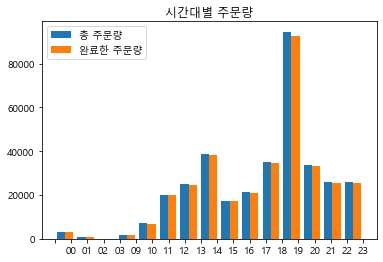

In [13]:
all_time_list = select_time(df['접수'])
time_list = select_time(df1['접수'])

hist = plt.hist((all_time_list, time_list), bins=17,
label=('총 주문량', '완료한 주문량'))
plt.title('시간대별 주문량')
plt.legend()
plt.show()

In [14]:
second = trans_second(df1['완료'], df1['픽업'])
max_time = trans_time(max(second))
min_time = trans_time(min(second))
avg_time = trans_time(sum(second)/len(second))

print(f'최대배달시간 : {max_time[0]}분 {max_time[1]}초')
print(f'최소배달시간 : {min_time[0]}분 {min_time[1]}초')
print(f'평균배달시간 : {avg_time[0]}분 {avg_time[1]}초')

second1 = [i for i in second if 300 < i < 1600]
max_time = trans_time(max(second1))
min_time = trans_time(min(second1))
avg_time = trans_time(sum(second1)/len(second1))

print(f'최대배달시간 : {max_time[0]}분 {max_time[1]}초')
print(f'최소배달시간 : {min_time[0]}분 {min_time[1]}초')
print(f'평균배달시간 : {avg_time[0]}분 {avg_time[1]}초')

plt.boxplot(second1)
plt.title('배달시간')
plt.xticks([1], ['초'])
plt.show()

최대배달시간 (1405, 17)
최소배달시간 (0, 0)
평균배달시간 (9, 0)
